#### **Mall Visiting Customers**

**Project Overview**

**Objective :** \
Analyze mall visiting customers across various dimensions like gender, age, annual income and spending score


**Dataset Source :** \
*kaggle.com/datasets/krishnaraj30/mall-visiting-customer-data*

**Goal :** \
Provide actionable insights into potential relationship between spending pattern and other variables. \
Identifying factors influencing spending score by gender, age and annual income

##### Import Libraries

In [3]:
# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization style libraries
# plt.style.use('dark_background')
plt.style.use('default')
import matplotlib
custom = {
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.figsize': (10,8),
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'axes.facecolor': '#aaaaaa',
    'figure.facecolor': '#bbbbbb',
    'grid.color': 'black',
    'grid.linewidth': 0.5,
    'grid.alpha': 0.3,
    'legend.edgecolor': '#000000',
    'scatter.edgecolors': 'black',
}
matplotlib.rcParams.update(custom)
import plotly.express as px

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Kagglehub library
import kagglehub

##### Data Collection

Loading Dataset

The dataset is stored in a downloadable csv file. \
It contains details such as customer id, gender, age, annual income and spending score

In [4]:
# Download csv files from kaggle and stored in local machine

path = 'krishnaraj30/mall-visiting-customer-data'
url = kagglehub.dataset_download(path)
urlpath = '\Mall_Customers.csv'
file = f'{url}{urlpath}'
df = pd.read_csv(fr'{file}', low_memory=False, encoding='utf-8')

##### Data Preprocessing

- Remove null or duplicate values
- Convert data types
- Assign/Create new column based on suitable preference

In [5]:
"""
Data Inspection
"""
# Summary
print(f'Summary Statistics: \n{df.describe()}\n')

# Dataset Shape
print(f'Total Rows: {df.shape[0]} \nTotal Columns: {df.shape[1]}\n')

# Missing Value
print(f'Missing Data per Column: \n{df.isnull().sum()}\n')

# Duplicate Value
print(f'Duplicate Data per Column: \n{df.duplicated().sum()}\n')

# Head
print(f'Head: \n{df.head()}\n')

# Info
print(f'Info: \n{df.info()}\n')

Summary Statistics: 
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

Total Rows: 200 
Total Columns: 5

Missing Data per Column: 
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicate Data per Column: 
0

Head: 
   CustomerID  Gender  Age  Annual Income (k$)  Spending Sc

##### Exploratory Data Analysis

In [6]:
# Overview dataset head
df [:2]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


Correlation Analysis :\
Identify correlations for all features to understand their relationships.

In [7]:
df_copy = df.copy()
df_copy = df_copy.apply(lambda col: col.astype('category').cat.codes if col.dtypes=='object' else col)

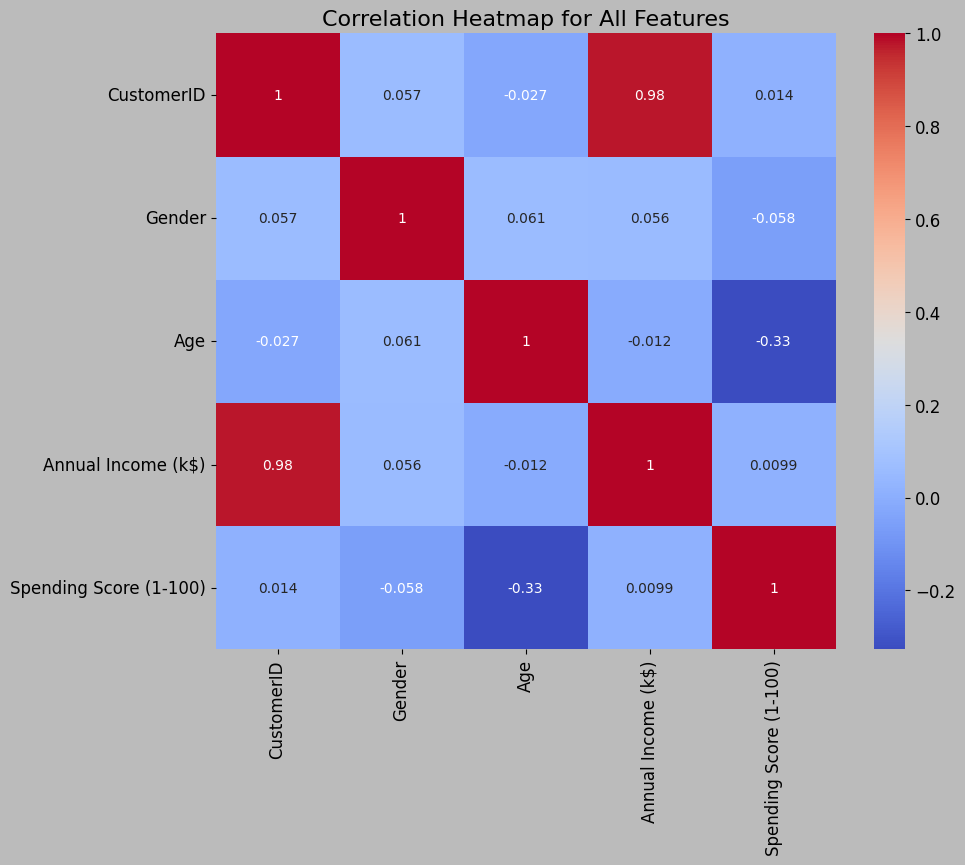

In [8]:
# Correlation Matrix Al Features

sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for All Features')
plt.show()

Customer Segmentation Analysis :\
Identify factors that influence mall visiting

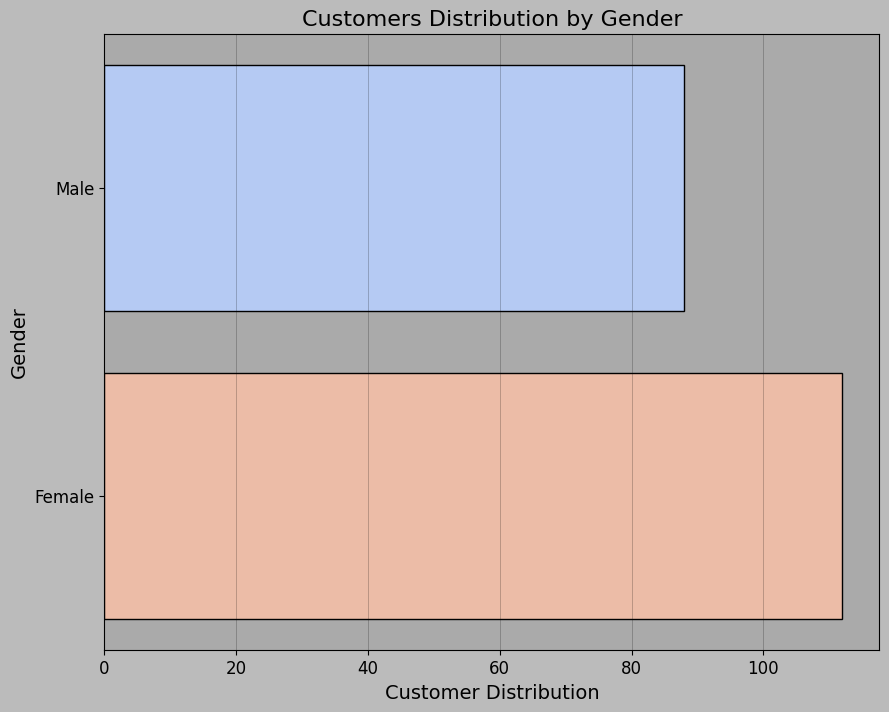

In [9]:
# Visiting Customers by Gender

sns.countplot(data=df, y='Gender', palette='coolwarm',
              edgecolor='black')
plt.title('Customers Distribution by Gender')
plt.xlabel('Customer Distribution')
plt.ylabel('Gender')
plt.grid(axis='x')
plt.show()

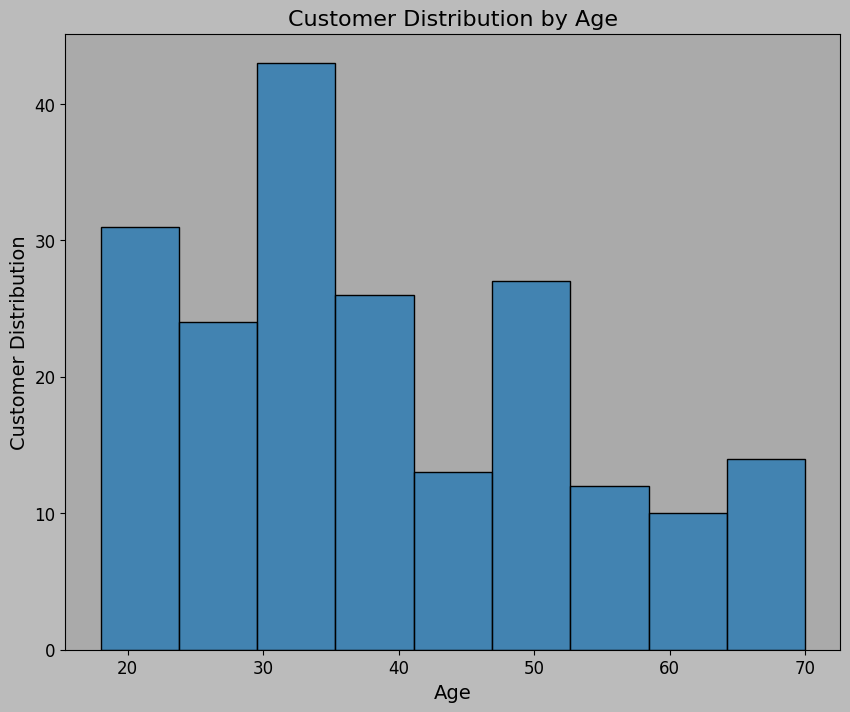

In [10]:
# Visiting Customers by Age

sns.histplot(data=df, x='Age',
             palette='coolwarm', edgecolor='black')
plt.title('Customer Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Customer Distribution')
plt.show()

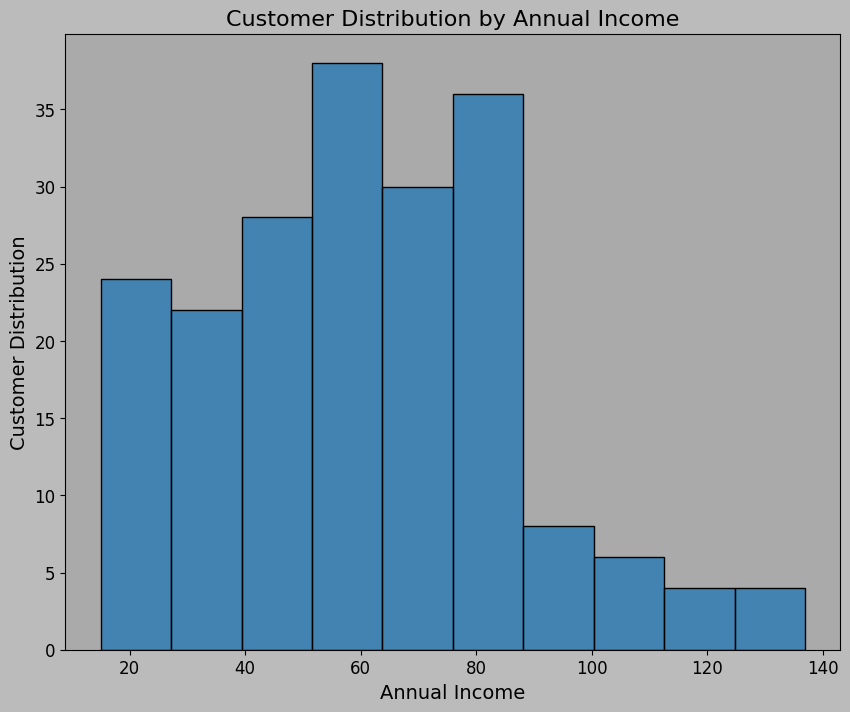

In [11]:
# Visiting Customers by Annual Income

sns.histplot (data=df, x='Annual Income (k$)',
              palette='coolwarm', edgecolor='black')
plt.title('Customer Distribution by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Customer Distribution')
plt.show()

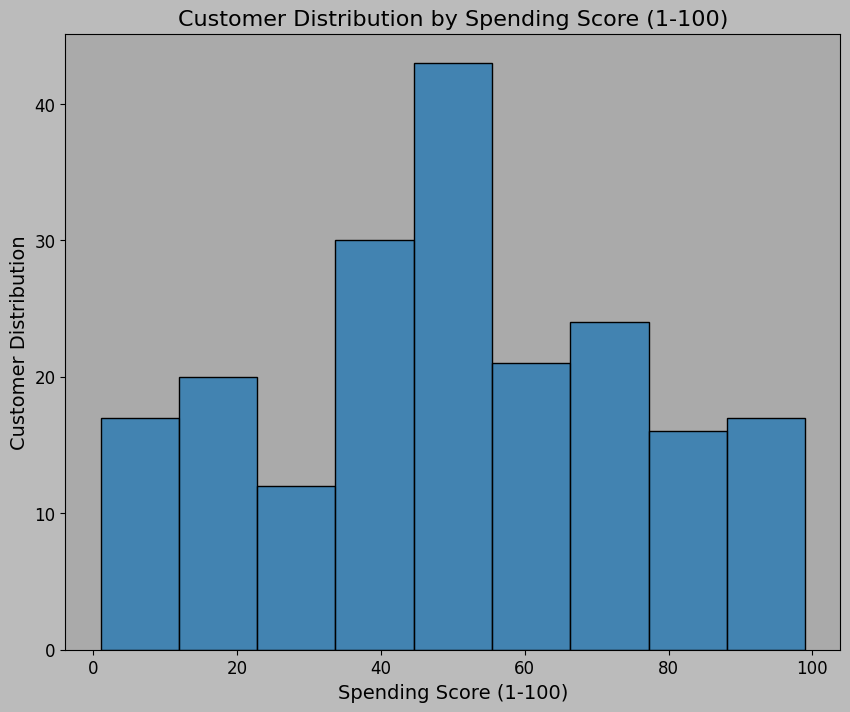

In [12]:
# Visiting Customers by Spending Score

sns.histplot(data=df, x='Spending Score (1-100)',
             palette='coolwarm', edgecolor='black')
plt.title('Customer Distribution by Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Customer Distribution')
plt.show()

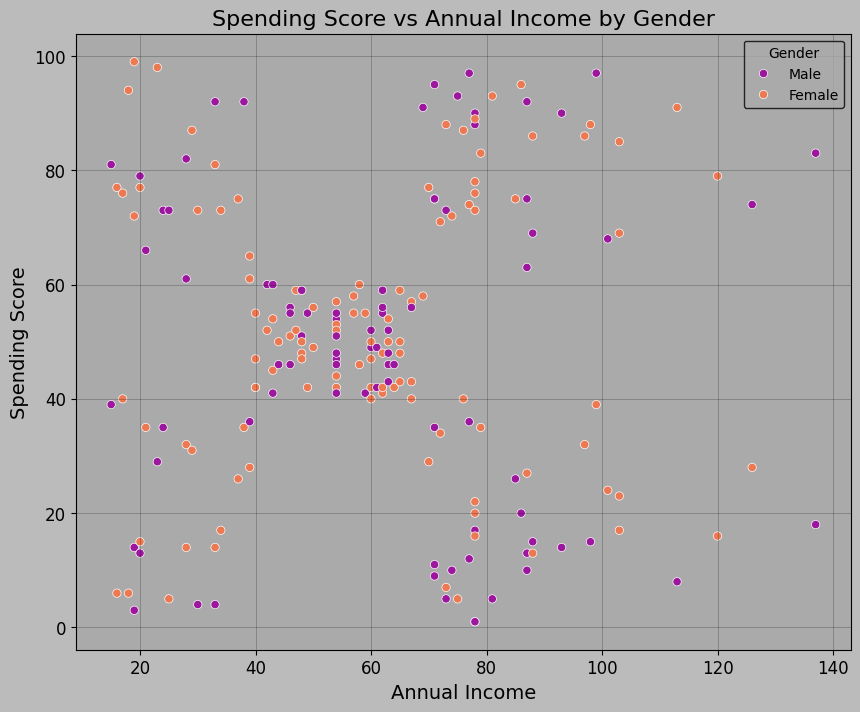

In [13]:
# Spending Score vs Annual Income by Gender

sns.scatterplot(data=df, x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='Gender', palette='plasma')
plt.title('Spending Score vs Annual Income by Gender')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.show()

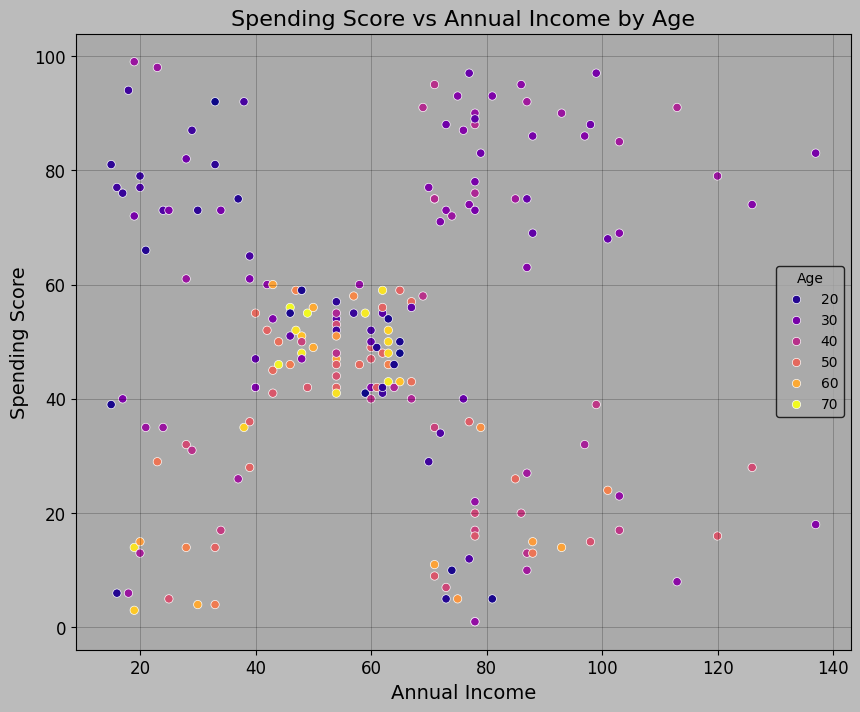

In [14]:
# Spending Score vs Annual Income by Age

sns.scatterplot(data=df, x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='Age', palette='plasma')
plt.title('Spending Score vs Annual Income by Age')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.show()

##### Advanced Analysis

In [15]:
# Import neccesary library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

K-Means Clustering

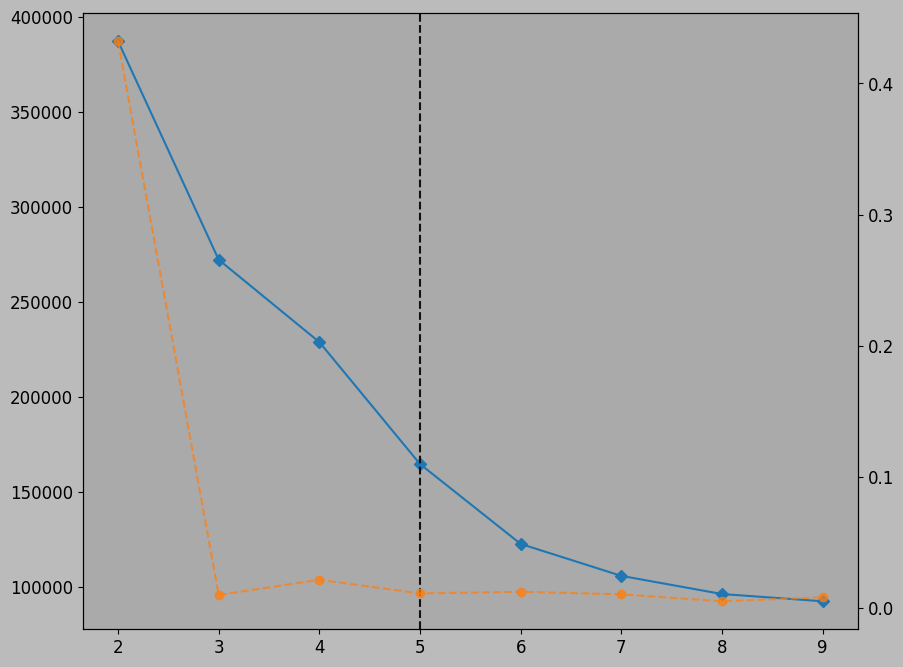

In [16]:
# Define K elbow point
KElbowVisualizer(KMeans(random_state=0),k=(2,10)).fit(df_copy)
plt.show()

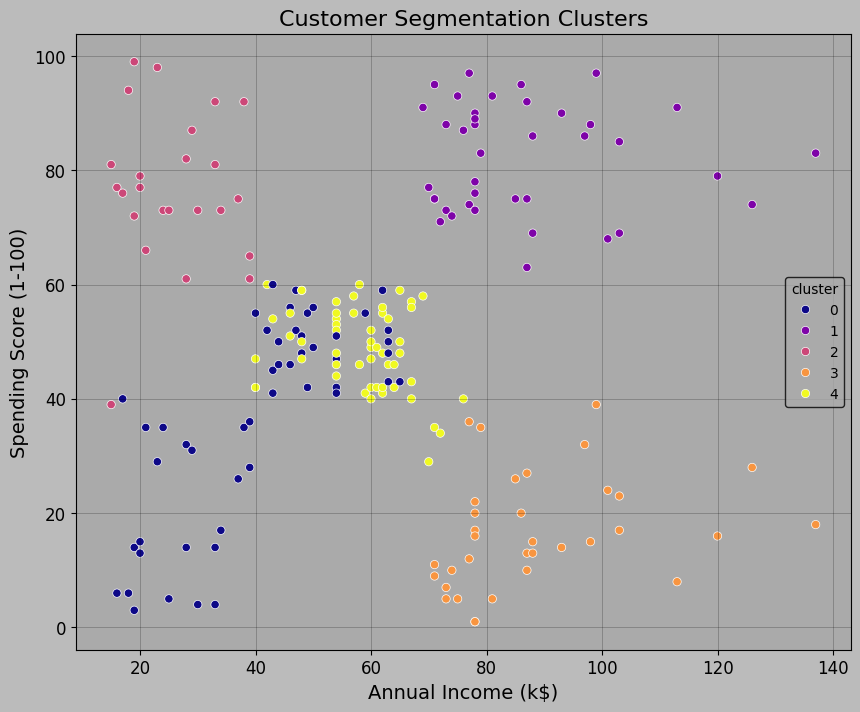

In [17]:
# Define features
features = df.drop(columns=['CustomerID']).dropna()
features['Gender'] = features['Gender'].map({'Male':0,'Female':1})

# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=0)
features['cluster'] = kmeans.fit_predict(features)

# Plotting
sns.scatterplot(data=features, x='Annual Income (k$)',
                y='Spending Score (1-100)', hue='cluster',
                palette='plasma')
plt.title('Customer Segmentation Clusters')
plt.grid(True)
plt.show()

In [18]:
# Calculate cluster percentage
for i,j in enumerate(features['cluster'].value_counts()):
  total = features['cluster'].count()
  percent = ((j/total)*100).round(1)
  print(f'Cluster {i} - {percent}%')

Cluster 0 - 26.5%
Cluster 1 - 25.0%
Cluster 2 - 19.5%
Cluster 3 - 17.0%
Cluster 4 - 12.0%


##### Summary/Conclusion

Mall Visiting Customers

Total Visitor : 200

By visitor gender :\
112 female, 88 male

By visitor age :\
Most visiting = 19 and 32 y/o

By visitor annual income :\
Most visiting = 54k and 78k per/annum

By visitor spending score :\
Most visiting = 42, 46, 55, 73

K-Means Clustering Distribution : 
- Cluster Blue = 26.5% (Low Income and Low Spending)
- Cluster Purple = 25.0% (High Income and High Spending)
- Cluster Red = 19.5% (Low Income and High Spending)
- Cluster Orange = 17.0% (High Income and Low Spending)
- Cluster Yellow = 12.0% (Medium Income and Medium Spending)